---
> # **UNIX Commands for Data Scientists** 
---

## **Declare filename**

### **ls**
_list directory contents_

In [3]:
!ls ../unix

Icon_
shakespeare.txt


In [4]:
filename = '../unix/shakespeare.txt'
!echo $filename 
print(filename)
# !echo == print()

../unix/shakespeare.txt 
../unix/shakespeare.txt


### **head (only first 30 lines of text)**
_output the first part of files_

In [5]:
!head -n 30 $filename

This is the 100th Etext file presented by Project Gutenberg, and
is presented in cooperation with World Library, Inc., from their
Library of the Future and Shakespeare CDROMS.  Project Gutenberg
often releases Etexts that are NOT placed in the Public Domain!!

Shakespeare

*This Etext has certain copyright implications you should read!*

<<THIS ELECTRONIC VERSION OF THE COMPLETE WORKS OF WILLIAM
SHAKESPEARE IS COPYRIGHT 1990-1993 BY WORLD LIBRARY, INC., AND IS
PROVIDED BY PROJECT GUTENBERG ETEXT OF ILLINOIS BENEDICTINE COLLEGE
WITH PERMISSION.  ELECTRONIC AND MACHINE READABLE COPIES MAY BE
DISTRIBUTED SO LONG AS SUCH COPIES (1) ARE FOR YOUR OR OTHERS
PERSONAL USE ONLY, AND (2) ARE NOT DISTRIBUTED OR USED
COMMERCIALLY.  PROHIBITED COMMERCIAL DISTRIBUTION INCLUDES BY ANY
SERVICE THAT CHARGES FOR DOWNLOAD TIME OR FOR MEMBERSHIP.>>

*Project Gutenberg is proud to cooperate with The World Library*
in the presentation of The Complete Works of William Shakespeare
for your reading for educatio

### **tail (10 last lines of text)**
_output the last part of files_

In [6]:
!tail -n 10 $filename

PERSONAL USE ONLY, AND (2) ARE NOT DISTRIBUTED OR USED
COMMERCIALLY.  PROHIBITED COMMERCIAL DISTRIBUTION INCLUDES BY ANY
SERVICE THAT CHARGES FOR DOWNLOAD TIME OR FOR MEMBERSHIP.>>



End of this Etext of The Complete Works of William Shakespeare





### **wc**
_print newline, word, and byte counts for each file_

### **Display the number of words, lines, characters**

In [7]:
# lines, words, characters
!wc $filename

 124505  901447 5583442 ../unix/shakespeare.txt


In [8]:
# only lines
!wc -l $filename

124505 ../unix/shakespeare.txt


In [9]:
# only words
!wc -w $filename

901447 ../unix/shakespeare.txt


In [10]:
# only characters
!wc -c $filename


5583442 ../unix/shakespeare.txt


In [11]:
# !cat $filename | WC -c == !wc -c $filename
f = !cat $filename | WC -c

# transform str. list element to int. number
int(f[0])

5583442

### _cat - concatenate files and print on the standard output_

In [12]:
_ / 1e6

5.583442

### **grep (global regular expression print)**
_print lines matching a pattern_

In [13]:
!grep -i 'parchment' $filename
# -i (--ignore-case)

  If the skin were parchment, and the blows you gave were ink,
  Ham. Is not parchment made of sheepskins?
    of the skin of an innocent lamb should be made parchment? That
    parchment, being scribbl'd o'er, should undo a man? Some say the
    Upon a parchment, and against this fire
    But here's a parchment with the seal of Caesar;  
    With inky blots and rotten parchment bonds;
    Nor brass, nor stone, nor parchment, bears not one,


In [14]:
!grep -o 'parchment' $filename
# -o (--only-matching)

# !grep -o 'parchment' $filename == !cat $filename | grep -o 'parchment' 

parchment
parchment
parchment
parchment
parchment
parchment
parchment
parchment


In [15]:
!cat $filename | grep -o 'parchment' | wc -l
# -l (--lines)

8


### **sed**
_stream editor for filtering and transforming text_

In [28]:
# replace all instances of 'parchment' to 'manuscript'
!sed -e 's/parchment/**manuscript**/g' $filename > temp.txt
# -e (expression - add the script to the commands to be executed)

* `s` for substitution
* `parchment` is the word to match
* `manuscript` is the replacement string
* `g` specifies to apply this to all occurrences on a line, not just the first

In [29]:
!grep -i 'manuscript' temp.txt

  If the skin were **manuscript**, and the blows you gave were ink,
  Ham. Is not **manuscript** made of sheepskins?
    of the skin of an innocent lamb should be made **manuscript**? That
    **manuscript**, being scribbl'd o'er, should undo a man? Some say the
    Upon a **manuscript**, and against this fire
    But here's a **manuscript** with the seal of Caesar;  
    With inky blots and rotten **manuscript** bonds;
    Nor brass, nor stone, nor **manuscript**, bears not one,


### **sort**
_sort lines of text files_

In [30]:
!head -n 5 $filename

This is the 100th Etext file presented by Project Gutenberg, and
is presented in cooperation with World Library, Inc., from their
Library of the Future and Shakespeare CDROMS.  Project Gutenberg
often releases Etexts that are NOT placed in the Public Domain!!



In [32]:
!head -n 5 $filename | sort
# If we sort these five lines, the sort will put these lines in ascending order of characters, LTIO, in character order based on ASCII numbers


Library of the Future and Shakespeare CDROMS.  Project Gutenberg
This is the 100th Etext file presented by Project Gutenberg, and
is presented in cooperation with World Library, Inc., from their
often releases Etexts that are NOT placed in the Public Domain!!


In [37]:
# uniq command for getting unique records using -u option
!sort $filename | uniq -u | wc -l
# -u (--unique) - only print unique lines

110834


### **uniq - report or omit repeated lines**

In [317]:
!sed -e 's/ /\ \n/g' < $filename | sort | uniq -c | sort -nr | head -15
# uniq -c (--count - prefix lines by the number of occurrences)

# sort -nr (-n, --numeric-sort - compare according to string numerical value)
#          (-r, --reverse - reverse the result of comparisons)

 502289  
  22678 the 
  19163 I 
  17868 and 
  15324 to 
  15216 of 
  14779 
  12152 a 
  10614 my 
   9347 in 
   8709 you 
   7662 is 
   7332 that 
   7065 And 
   6737 not 


sort: write failed: 'standard output': Illegal seek
sort: write error


In [365]:
!sed -e 's/ /\'\'\n/g' < $filename | sort |uniq -c | sort -nr | head -15 > count_vs_words

sort: write failed: 'standard output': Illegal seek
sort: write error


In [366]:
!cat count_vs_words

 502289 ''
  22678 the''
  19163 I''
  17868 and''
  15324 to''
  15216 of''
  14779 
  12152 a''
  10614 my''
   9347 in''
   8709 you''
   7662 is''
   7332 that''
   7065 And''
   6737 not''


In [367]:
%matplotlib inline

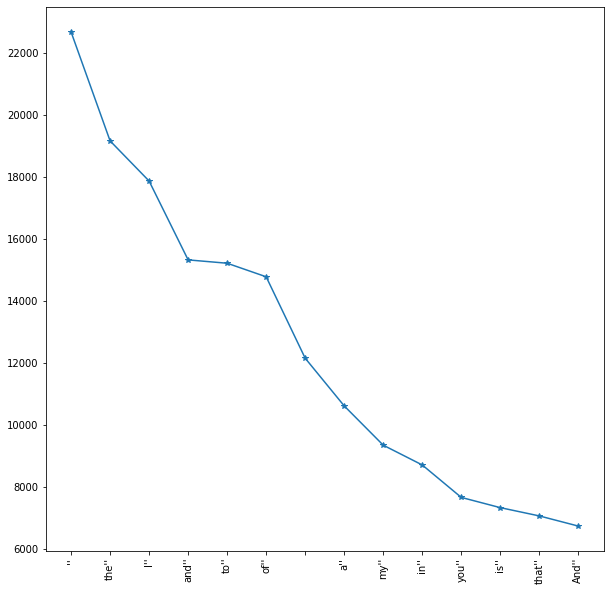

In [368]:
import matplotlib.pyplot as plt
import csv

xTicks = []
y = []

with open('count_vs_words', 'r') as csvfile:
    plots = csv.reader(csvfile, delimiter = ' ')    
    #CSV (Comma Separated Values) является наиболее распространенным форматом импорта и экспорта для электронных таблиц и баз данных. 
    
    for row in plots:
        y.append(int(row[-2]))
        xTicks.append(str(row[-1]))

# remove the count of spaces (first line)
y = y[1:]

#plot
x = range(len(y))
plt.figure(figsize = (10, 10))
plt.xticks(x, xTicks, rotation = 90) #xlabel with 90 degree angle
plt.plot(x, y, '*-')
plt.show()

**Модуль csv** дает программисту возможность выполнять структурный анализ файлов **CSV (Comma Separated Values – переменные, разделенные запятыми)**. </br>**Файл CSV** – это текстовый файл, в котором каждая строка имеет несколько полей, разделенных запятыми, или другими разделителями. </br>Вы можете рассматривать каждую строчку как ряд, а каждое поле — как столбец. </br>Формат CSV не имеет стандарта, но эти файлы достаточно похожи, так что модуль csv может распознавать большую часть этих файлов. </br>Вы также можете создавать файлы CSV, используя данный модуль.